# 動画処理・動画解析

## MeanShift/Camshiftの理論
-  pixelの密度最大の場所を追いかける

### MeanShift(ミーンシフト) / CamShift(カムシフト)

- MeanShift アルゴリズム
1. ある場所から探索窓が出発する(userが指定)：探索窓のsize,出発点 etc... 
2. 探索窓内の画素値の重心を計算する
3. その後に探索窓の重心を円の中心に移動する
4. 2,3 を繰り返す : 画素値の分布が変わるのでまた重心を計算する -> その後に探索窓の重心を円の中心に移動する

#### 上記をすると何が起こるのか？
- <u>pixel密度が最大の方向を目指して動いている</u>


### CamShift(カムシフト)
- 探索窓　size　が探索物によって可変になる

### 注意点
- 探索開始場所や窓の大きさのパラメーター次第で答えが変わる
- 開始位置がA・Bで違う場合
    - Aの探索窓は,大域最大値にたどり着けるが
    - Bの探索窓は,局所解に陥ってしまう

- 探索窓の大きさがA・Bで違う場合
    - A　：　探索窓大き過ぎて大域最大値に行きやすいが、枠が大きいので検出・抽出ができない
    - B　：　探索窓が小さすぎてトラップされて動けない
    
#### 出発点や窓の大きさは追いたい対象にある程度調整する必要がある
- <u>窓の大きさは CamShift である程度補える</u>

In [1]:
import cv2

In [2]:
cap = cv2.VideoCapture("data/movie/Cruse.mp4")

### cruse video image

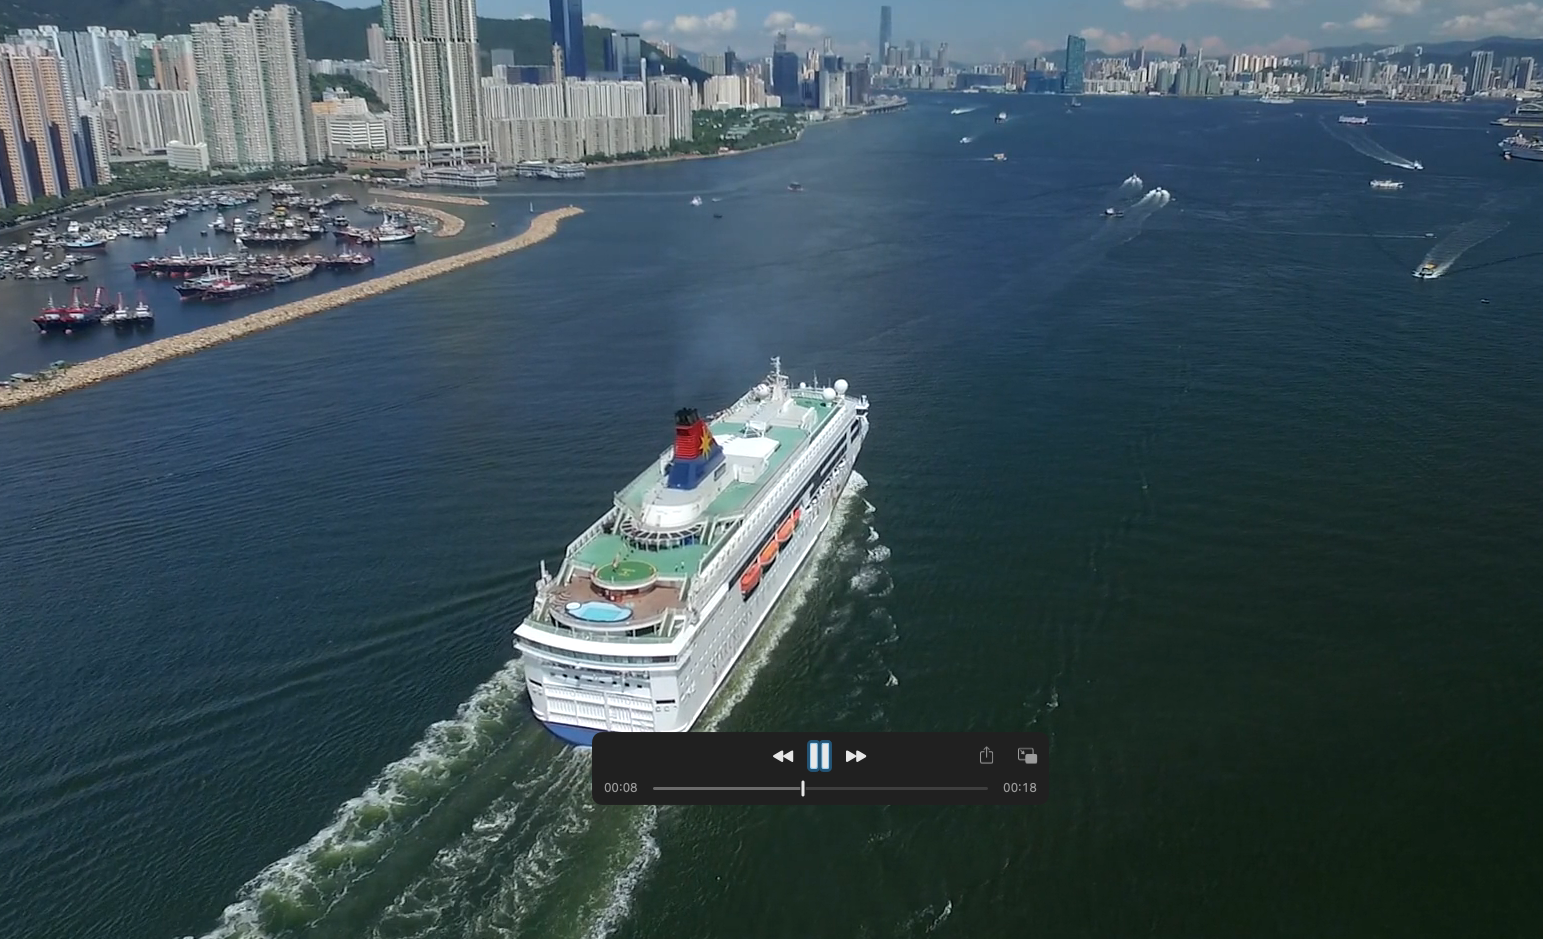

In [3]:
ret, frame = cap.read()  # 1
h, w, ch = frame.shape  # 2

In [4]:
rct = (600, 500, 200, 200)  # 3 
cv2.namedWindow("win", cv2.WINDOW_NORMAL) # 4
cv2.resizeWindow("win", 1200, 800)  # 4
cri = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 10, 1)  # 5
while(True):
    threshold = 100 #  6
    ret, frame = cap.read()  # 7
    if ret == False:  # 8
        break
    img_g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 9
    ret, img_bin = cv2.threshold(img_g, threshold, 255, cv2.THRESH_BINARY)  # 10
    ret, rct = cv2.meanShift(img_bin, rct, cri)  # 11
    x, y, w, h = rct  # 12
    frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
    cv2.imshow("win", frame)
    if cv2.waitKey(10) == 27:  # 14
        break
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release() 

2021-08-19 18:47:43.200 python3[5413:217990] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-19 18:47:43.200 python3[5413:217990] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-19 18:47:43.200 python3[5413:217990] Text input context does not respond to _valueForTIProperty:
2021-08-19 18:47:43.218 python3[5413:217990] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-19 18:47:43.218 python3[5413:217990] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-19 18:47:43.218 python3[5413:217990] Text input context does not respond to _valueForTIProperty:


### MeaanShift後 video image

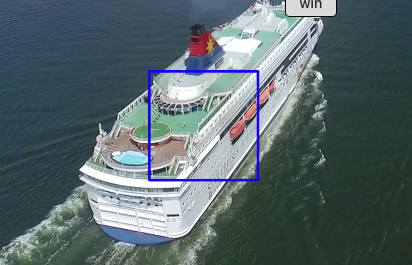

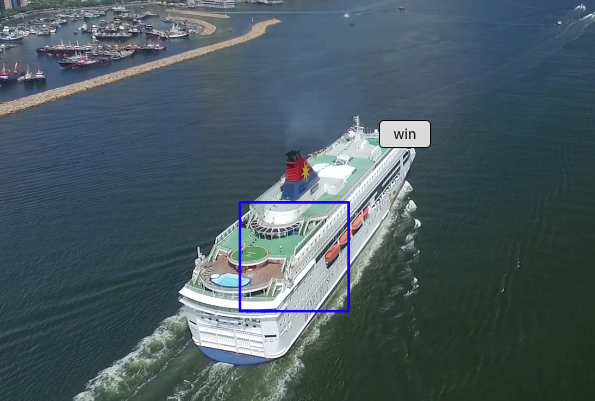

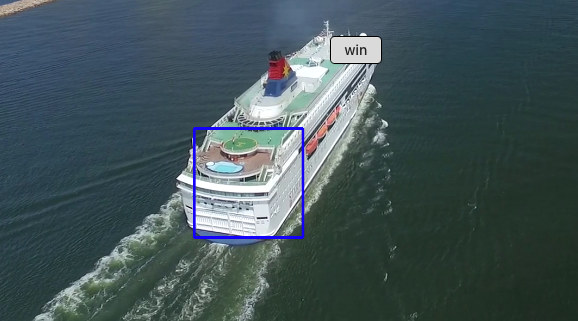

- 青い枠が探索窓
- 最初は真ん中くらいからスタートしているのだが、その後pixel最大密度を探してそちらに動いていく
- 時間の変化とともに探索窓(フレーム)も、最大密度をトラックキングして動いていく
- クルーズの動きを追いかけて行くことができる

### MeanShift/CamShift code 解析

1. 1 frame だけ読み込む

2. 幅・高さ・チャンネル数を取得

3. 探索窓の開始点 : x座標, y座標　 : 窓の大きさ

4. window size が大きので resize する

5. 収束条件 : 何回動いたら、その時点で収束したとみなす | 探索窓が指定pixel以上動かなくなったら収束したとみなす : 10回 : 1px

6. MeanShift に　２値画像が必要になってくるので threshold を設定しておく

7. 1 frame 読み込む

8. 最後まで読み込んでいた場合は break する

9. グレースケールに変換する

10. これによって 2値画像が取得できる

11. ret, rct を返す MeanShift を使用する
    - ２値化画像 : 探索窓の条件、開始点 : 収束条件 : -> rct に更新する

12. rct に入っている情報を x, y, w, h に代入する

13. MeanShift で検出した情報（枠）を rectangle　で書き込む

14. esc で break
    - あとは default の記述
    - 全てのウィンドウを閉じて、メモリの解放

## CamShift の実行
- こちらは非常に簡単に行える

#### meanShift -> CamShift に置き換えるだけ

In [5]:
import cv2

In [6]:
cap = cv2.VideoCapture("data/movie/Cruse.mp4")

In [7]:
ret, frame = cap.read()  # 1
h, w, ch = frame.shape  # 2

In [8]:
rct = (600, 500, 200, 200)  # 3 
cv2.namedWindow("win", cv2.WINDOW_NORMAL) # 4
cv2.resizeWindow("win", 1200, 800)  # 4
cri = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 10, 1)  # 5
while(True):
    threshold = 100 #  6
    ret, frame = cap.read()  # 7
    if ret == False:  # 8
        break
    img_g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 9
    ret, img_bin = cv2.threshold(img_g, threshold, 255, cv2.THRESH_BINARY)  # 10
    ret, rct = cv2.CamShift(img_bin, rct, cri)  # 11
    x, y, w, h = rct  # 12
    frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
    cv2.imshow("win", frame)
    if cv2.waitKey(10) == 27:  # 14
        break
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release() 

2021-08-19 18:48:09.838 python3[5413:217990] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (14.80 secs).
2021-08-19 18:48:09.839 python3[5413:217990] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-19 18:48:09.839 python3[5413:217990] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-19 18:48:09.839 python3[5413:217990] Text input context does not respond to _valueForTIProperty:
2021-08-19 18:48:09.839 python3[5413:217990] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-19 18:48:09.839 python3[5413:217990] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-19 18:48:09.839 python3[5413:217990] Text input context does not respond to _valueForTIProperty:
2021-08-19 18:48:09.839 python3[5413:217990] IMKClient Stall 

### CamShift後の video image

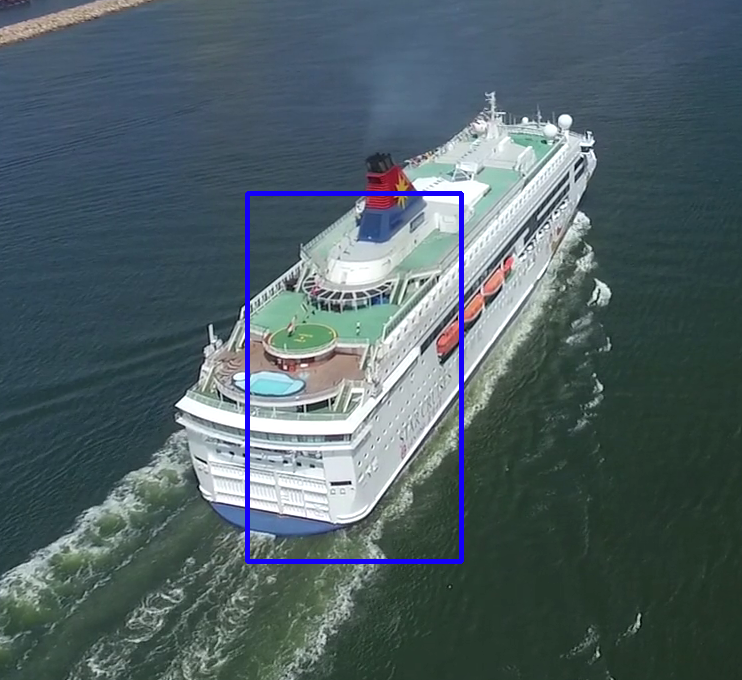

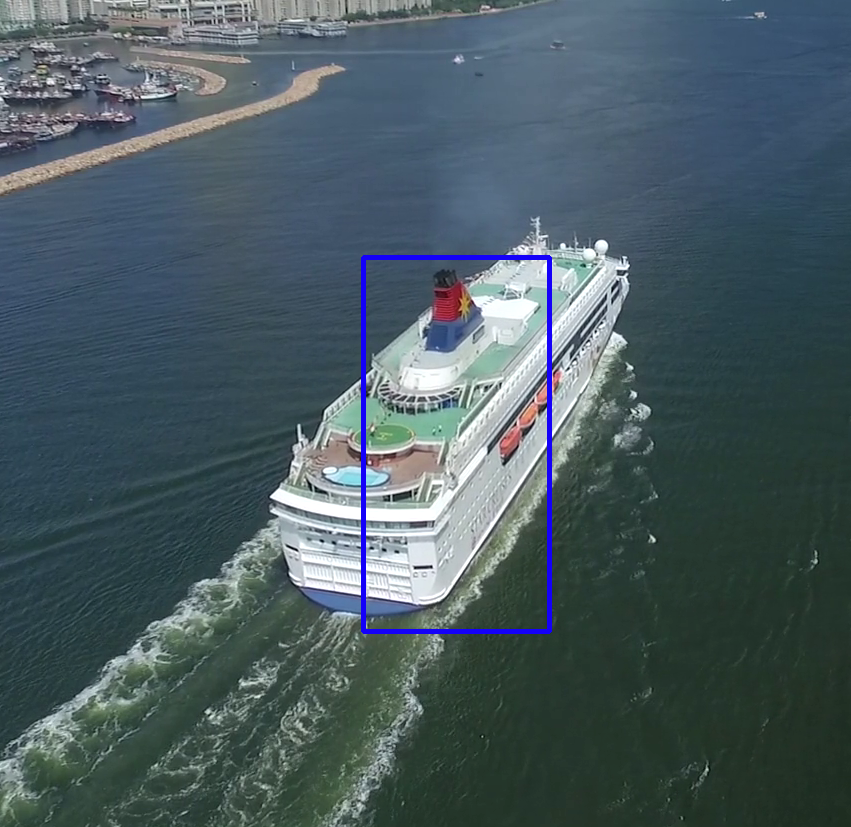

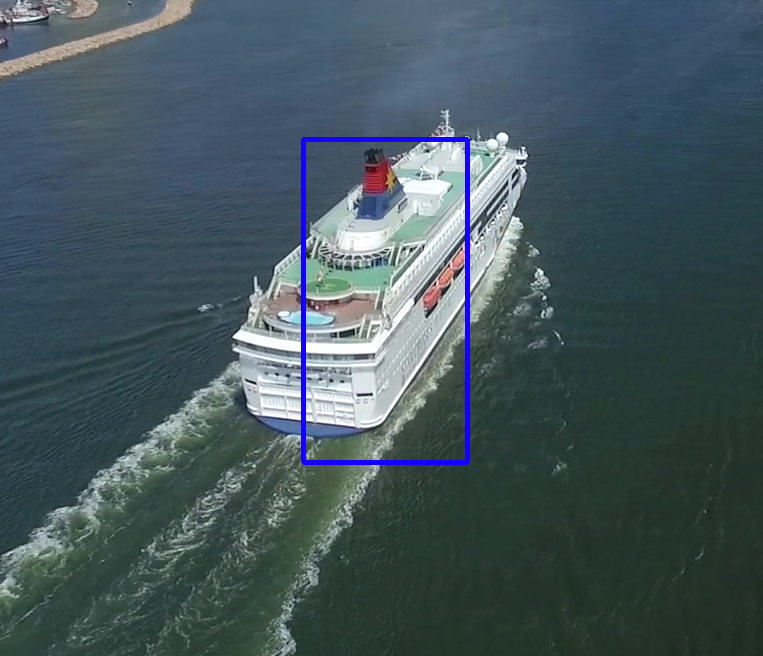

- CamShift は探索窓は探索窓の大きさが時間とともに自在に変化していく